In [12]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import os

import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

from tensorflow.keras.applications import DenseNet121
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout,MaxPooling2D , Conv2D,Flatten
from tensorflow.keras.models import Sequential

from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import classification_report


from IPython.display import clear_output
import warnings
warnings.filterwarnings('ignore')

In [9]:
pip install tensorflow==2.1.0

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==2.1.0 (from versions: none)
ERROR: No matching distribution found for tensorflow==2.1.0


In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!kaggle datasets download -d odins0n/ucf-crime-dataset

The syntax of the command is incorrect.
'cp' is not recognized as an internal or external command,
operable program or batch file.
'kaggle' is not recognized as an internal or external command,
operable program or batch file.


In [ ]:
!unzip /content/ucf-crime-dataset.zip

Streaming output truncated to the last 5000 lines.
  inflating: Train/Vandalism/Vandalism035_x264_230.png  
  inflating: Train/Vandalism/Vandalism035_x264_240.png  
  inflating: Train/Vandalism/Vandalism035_x264_250.png  
  inflating: Train/Vandalism/Vandalism035_x264_260.png  
  inflating: Train/Vandalism/Vandalism035_x264_270.png  
  inflating: Train/Vandalism/Vandalism035_x264_280.png  
  inflating: Train/Vandalism/Vandalism035_x264_290.png  
  inflating: Train/Vandalism/Vandalism035_x264_30.png  
  inflating: Train/Vandalism/Vandalism035_x264_300.png  
  inflating: Train/Vandalism/Vandalism035_x264_310.png  
  inflating: Train/Vandalism/Vandalism035_x264_320.png  
  inflating: Train/Vandalism/Vandalism035_x264_330.png  
  inflating: Train/Vandalism/Vandalism035_x264_340.png  
  inflating: Train/Vandalism/Vandalism035_x264_350.png  
  inflating: Train/Vandalism/Vandalism035_x264_360.png  
  inflating: Train/Vandalism/Vandalism035_x264_370.png  
  inflating: Train/Vandalism/Vandalism

In [13]:
train_dir="C:\\Users\\byred\\Downloads\\Train"
test_dir="C:\\Users\\byred\\Downloads\\Test"

In [14]:

SEED = 12
IMG_HEIGHT = 64
IMG_WIDTH = 64
BATCH_SIZE = 128
EPOCHS = 1
LR =  0.00003

In [15]:

crime_types=os.listdir(train_dir)
n=len(crime_types)
print("Number of crime categories : ",n)

Number of crime categories :  14


In [16]:

crimes={}
train=test=0
for clss in crime_types:
    num=len(os.listdir(os.path.join(train_dir,clss)))
    train+=num
    test+=len(os.listdir(os.path.join(test_dir,clss)))

    crimes[clss]=num


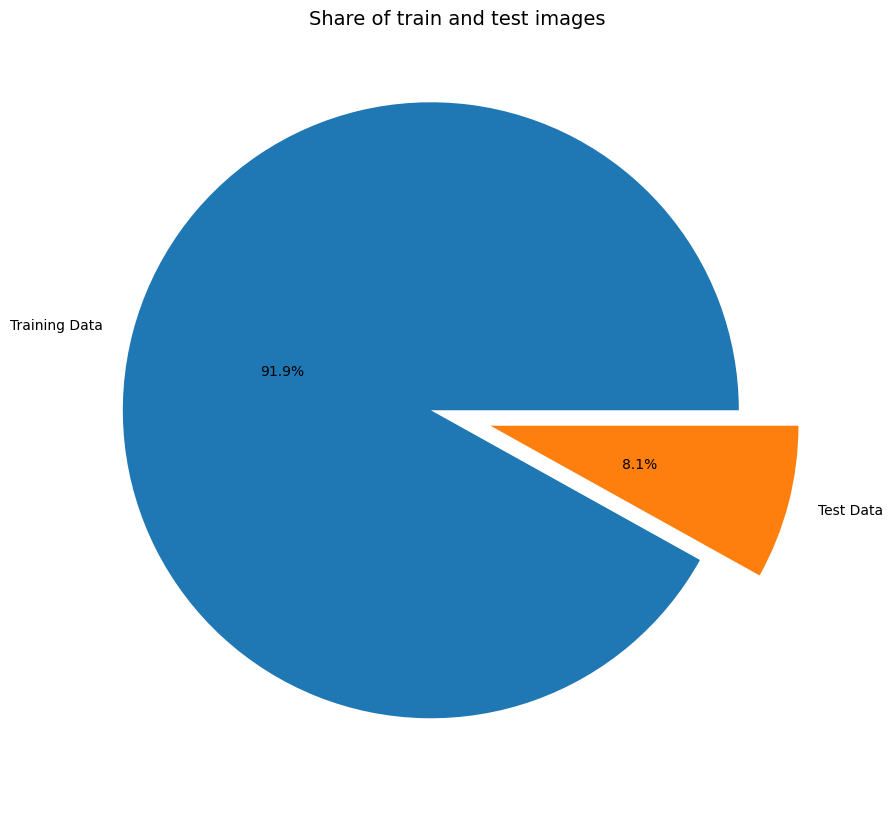

In [17]:

plt.figure(figsize=(15, 10))
plt.pie(x=np.array([train,test]), autopct="%.1f%%", explode=[0.1, 0.1],
        labels=["Training Data", "Test Data"], pctdistance=0.5)
plt.title("Share of train and test images ", fontsize=14);

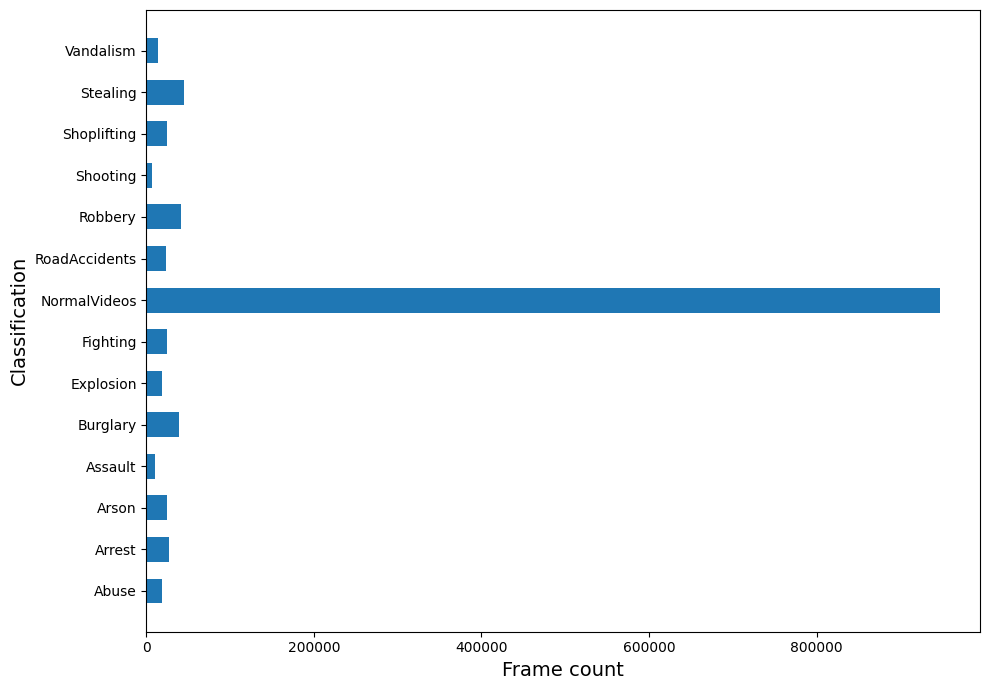

In [18]:

plt.figure(figsize=(10, 7))
plt.barh(list(crimes.keys()), list(crimes.values()), height=0.6, align="center")
plt.yticks(rotation=0)

plt.xlabel("Frame count", fontsize=14)
plt.ylabel("Classification", fontsize=14)
plt.tight_layout()
plt.show()


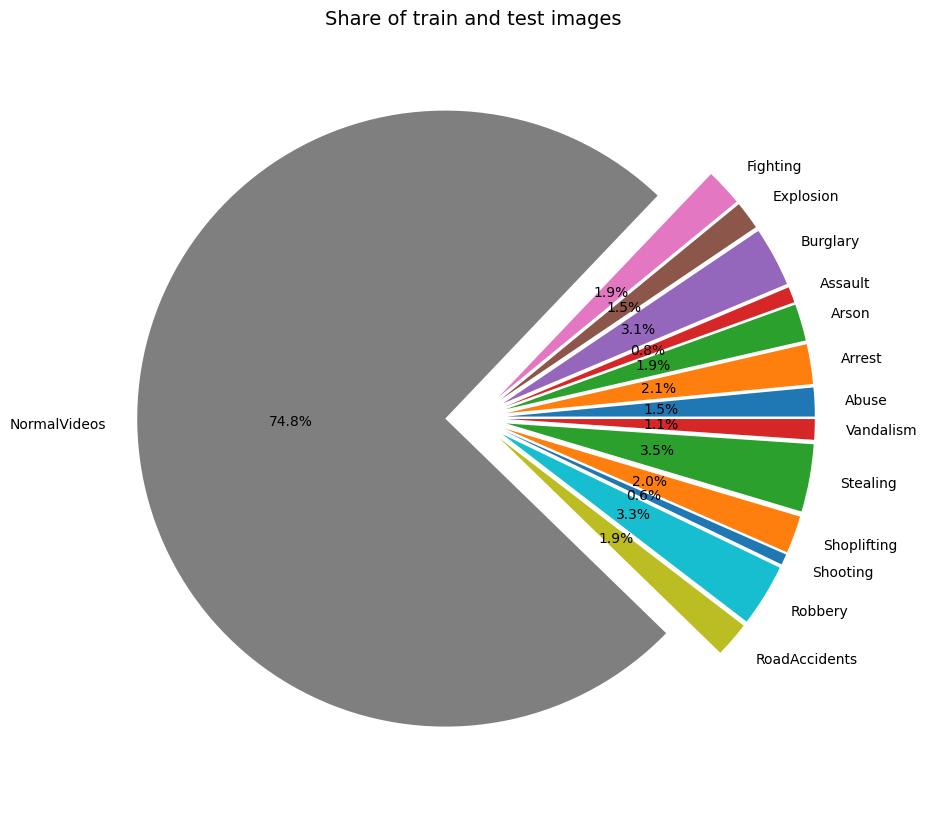

In [19]:

plt.figure(figsize=(15,10))
plt.pie(x=np.array(list(crimes.values())), autopct="%.1f%%", 
        explode=[0.1]*n,labels=list(crimes.keys()), pctdistance=0.5)
plt.title("Share of train and test images ", fontsize=14);

In [20]:
IMG_WIDTH=64
IMG_HEIGHT=64

IMG_SHAPE=(IMG_HEIGHT,IMG_WIDTH)
seed=69

INPUT_SHAPE=(IMG_HEIGHT,IMG_WIDTH,3)

In [21]:
train_set=image_dataset_from_directory(
    train_dir,
    label_mode="categorical",
    batch_size=BATCH_SIZE,
    image_size=IMG_SHAPE,
    shuffle=True,
    seed=seed,
    validation_split=0.2,
    subset="training",
)

val_set=image_dataset_from_directory(
    train_dir,
    label_mode="categorical",
    batch_size=BATCH_SIZE,
    image_size=IMG_SHAPE,
    shuffle=True,
    seed=seed,
    validation_split=0.2,
    subset="validation",
)

test_set=image_dataset_from_directory(
    test_dir,
    label_mode="categorical",
    class_names=None,
    batch_size=BATCH_SIZE,
    image_size=IMG_SHAPE,
    shuffle=False,
    seed=seed,
)

Found 1266345 files belonging to 14 classes.
Using 1013076 files for training.
Found 1266345 files belonging to 14 classes.
Using 253269 files for validation.
Found 111308 files belonging to 14 classes.


In [22]:

def transfer_learning():
    base_model=DenseNet121(include_top=False,input_shape=INPUT_SHAPE,weights="imagenet")

    thr=149
    for layers in base_model.layers[:thr]:
        layers.trainable=False

    for layers in base_model.layers[thr:]:
        layers.trainable=True

    return base_model


In [23]:
def transfer_learning():
    base_model=DenseNet121(include_top=False,input_shape=INPUT_SHAPE,weights="imagenet")

    thr=149
    for layers in base_model.layers[:thr]:
        layers.trainable=False

    for layers in base_model.layers[thr:]:
        layers.trainable=True

    return base_model


In [24]:


def create_model():
    model=Sequential()

    base_model=transfer_learning()
    model.add(base_model)

    model.add(GlobalAveragePooling2D())

    model.add(Dense(128, activation="relu"))
    model.add(Dropout(0.2))

    model.add(Dense(n,activation="softmax",name="classification"))

    model.summary()

    return model

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout



In [26]:

model=create_model()

model.compile(optimizer="adam",
                loss='categorical_crossentropy',
                metrics = [tf.keras.metrics.AUC()])



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 2, 2, 1024)        7037504   
                                                                 
 global_average_pooling2d (  (None, 1024)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               131200    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 classification (Dense)      (None, 14)                1806      
                                                                 
Total params: 7170510 (27.35 MB)
Trainable params: 5586254 (21.31 MB)
Non-trainable params: 1584256 (6.04 MB)
__________

In [27]:
history = model.fit(x = train_set,validation_data=val_set,epochs = 1)


7915/7915 [==============================] - 9596s 1s/step - loss: 0.0606 - auc: 0.9991 - val_loss: 0.0218 - val_auc: 0.9996


In [28]:
y_true =  np.array([])

for x, y in test_set:
  y_true = np.concatenate([y_true, np.argmax(y.numpy(), axis=-1)])

In [29]:

y_pred=model.predict(test_set)

870/870 [==============================] - 511s 584ms/step


In [30]:

y_pred

array([[3.0880009e-03, 1.7380975e-03, 1.3943062e-04, ..., 1.5819543e-05,
        9.5407566e-04, 6.7990442e-04],
       [3.1080229e-02, 1.4296169e-02, 5.4198789e-04, ..., 1.1282662e-04,
        9.8615158e-03, 1.8189388e-03],
       [1.0354885e-04, 2.8770458e-04, 2.6868008e-06, ..., 9.3862002e-07,
        2.1923824e-04, 2.4584808e-05],
       ...,
       [1.1555356e-07, 6.4424142e-08, 3.7523620e-08, ..., 2.6247787e-07,
        1.9616142e-10, 1.2667341e-09],
       [3.2819347e-07, 1.8958501e-06, 7.4705275e-07, ..., 4.1913395e-06,
        3.1246148e-09, 3.4238088e-08],
       [6.9197858e-07, 7.2746070e-07, 5.8925718e-07, ..., 5.7878792e-06,
        5.7326619e-09, 7.0269422e-08]], dtype=float32)

In [31]:


y_true

array([ 0.,  0.,  0., ..., 13., 13., 13.])

In [32]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    for (idx, c_label) in enumerate(crime_types):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr,lw=2, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'black',linestyle='dashed', lw=4, label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)

In [33]:

from sklearn.preprocessing import LabelBinarizer

ROC AUC score: 0.827500402252356


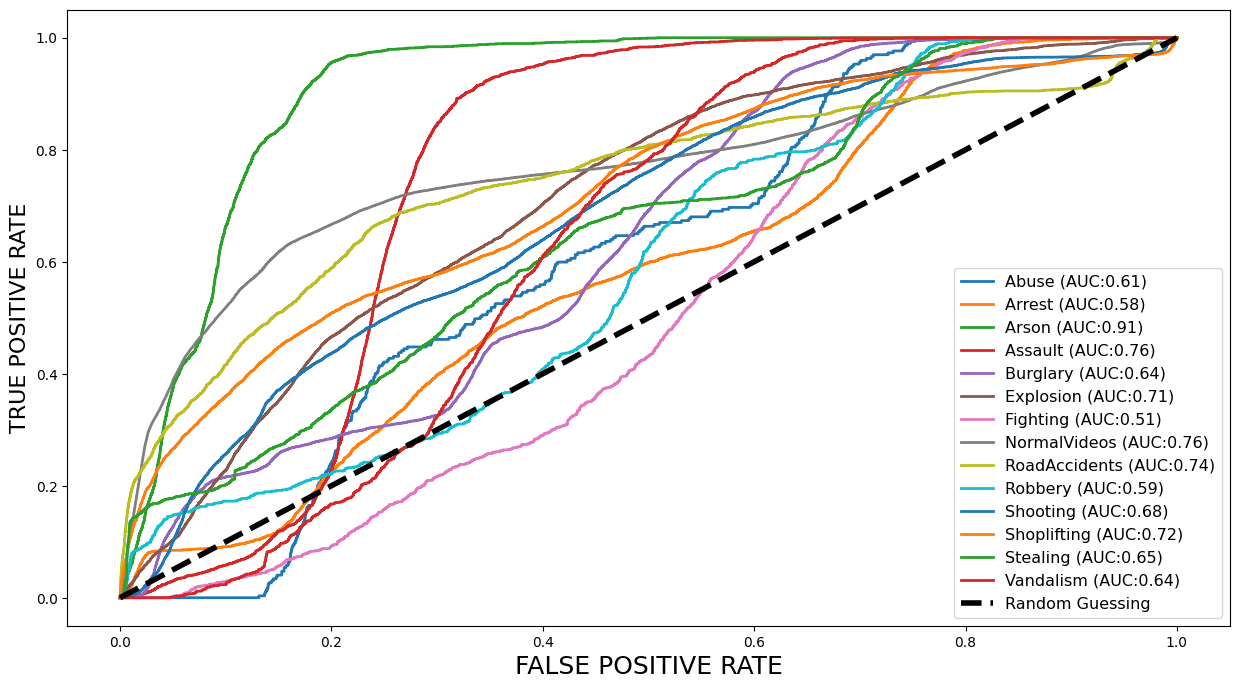

In [34]:
fig, c_ax = plt.subplots(1,1, figsize = (15,8))


print('ROC AUC score:', multiclass_roc_auc_score(y_true , y_pred  , average = "micro"))
plt.xlabel('FALSE POSITIVE RATE', fontsize=18)
plt.ylabel('TRUE POSITIVE RATE', fontsize=16)
plt.legend(fontsize = 11.5)
plt.show()

In [35]:

model.save("crime2.h5")

In [36]:

model.save("C:\\Users\\byred\\Downloads\\H5i")

INFO:tensorflow:Assets written to: C:\Users\byred\Downloads\H5i\assets


INFO:tensorflow:Assets written to: C:\Users\byred\Downloads\H5i\assets


In [38]:


from tensorflow.keras.models import load_model
model.load_weights("C:\\Users\\byred\\Downloads\\crime2.h5")

In [39]:
y_true= np.array([])
for x,y in test_set:
  y_true=np.concatenate([y_true,np.argmax(y.numpy(),axis=-1)])

In [40]:

y_true

array([ 0.,  0.,  0., ..., 13., 13., 13.])

In [41]:

import keras.utils as image
from tensorflow.keras.preprocessing.image import load_img

In [43]:
from tensorflow.keras.models import load_model
model=load_model("C:\\Users\\byred\\Downloads\\crime2.h5")

In [44]:
from tensorflow.keras.preprocessing import image
img= image.load_img("C:\\Users\\byred\\Downloads\\Test\\Abuse\\Abuse028_x264_770.png",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x))
op=['Fighting','Burglary','Vandalism','Assault','Stealing','RoadAccidents','NormalVideos'
    ,'Explosion','Abuse','Robbery','Arrest','Shooting','Shoplifting','Arson']
print(pred)
op[pred]

1/1 [==============================] - 3s 3s/step
8


'Abuse'

In [ ]:

from tensorflow.keras.preprocessing import image
img= image.load_img("/content/Test/Arson/Arson007_x264_1110.png",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x))
op=['Fighting','Burglary','Vandalism','Assault','Stealing','RoadAccidents','NormalVideos',
    'Explosion','Abuse','Robbery','Arrest','Shooting','Shoplifting','Arson']
print(pred)
op[pred]

1/1 [==============================] - 0s 284ms/step
13


'Arson'

In [ ]:
img= image.load_img("/content/Test/Abuse/Abuse028_x264_1190.png",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x))
op=['Fighting','Burglary','Vandalism','Assault','Stealing','RoadAccidents','NormalVideos','Explosion','Abuse','Robbery','Arrest','Shooting','Shoplifting','Arson']
print(pred)
op[pred]

1/1 [==============================] - 0s 311ms/step
8


'Abuse'

In [ ]:
img= image.load_img("/content/Test/Arson/Arson007_x264_1140.png",target_size=(64,64))
x=image.img_to_array(img)
x=np.expand_dims(x,axis=0)
pred=np.argmax(model.predict(x))
op=['Fighting','Burglary','Vandalism','Assault','Stealing','RoadAccidents','NormalVideos'
    ,'Explosion','Abuse','Robbery','Arrest','Shooting','Shoplifting','Arson']
print(pred)
op[pred]

1/1 [==============================] - 0s 149ms/step
13


'Arson'